FEUILLE DE TP 4

---
# Polynôme interpolateur de Lagrange (Partie 1)
---

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np                       # pour les numpy array
from scipy.interpolate import lagrange   # interpolation de Lagrange
import matplotlib.pyplot as plt          # librairie graphique

Nous rappelons le résultat d'existence et d'unicité vu en cours

> **(Polynôme interpolateur de Lagrange)**<br>
> Etant donnés $N$ un entier strictement positif, $x_1,\ldots,x_N$ des réels deux à deux distincts et $y_1,\ldots,y_N$ des réels, il existe un unique polynôme $P$ qui vérifie
> $$ P\in\mathbb{R}_{N-1}[X], \qquad P(x_i)=y_i, \quad 1\leq i\leq N.$$

## Construction en utilisant les modules `numpy` et `scipy`

Le module `numpy` permet la manipulation de polynômes réels à l'aide de la classe `poly1d`. Voici un exemple pour le polynôme $P=X^2-2$

```python
P = np.poly1d([1, 0, -2])
print(P)
```

Il est possible de faire des manipulations algébriques sur les polynômes :

```python
X = np.poly1d([1, 0])
P = X**2 - 2
print(P)
```

Il est également possible d'évaluer un polynôme comme une fonction (évaluation sur un scalaire ou sur un tableau `numpy`) :

```python
print(P(1))
print(P(np.linspace(0, 1, 11)))
```

In [3]:
P = np.poly1d([1, 0, -2])
print(P)

   2
1 x - 2


In [4]:
X = np.poly1d([1, 0])
P = X**2 - 2
print(P)

   2
1 x - 2


In [5]:
print(P(1))
print(P(np.linspace(0, 1, 11)))

-1
[-2.   -1.99 -1.96 -1.91 -1.84 -1.75 -1.64 -1.51 -1.36 -1.19 -1.  ]


Le module `scipy.interpolate` permet de déterminer le polynôme interpolateur à l'aide de la fonction `lagrange`. Voici un exemple d'utilisation pour déterminer le polynôme interpolateur de Lagrange aux points $(0, -2)$, $(1,-1)$ et $(2, 2)$ (c'est encore et toujours le polynôme $X^2-2$...)

```python
from scipy.interpolate import lagrange
x = np.array([0, 1, 2])
y = np.array([-2, -1, 2])
P = lagrange(x, y)
print(P)
```

In [6]:
from scipy.interpolate import lagrange
x = np.array([0, 1, 2])
y = np.array([-2, -1, 2])
P = lagrange(x, y)
print(P)

   2
1 x - 2


**Question**

> Proposez une fonction `interp` qui 
> * prend en argument deux `ndarray` `x` et `y` de taille `N` et un `ndarray` `xx` de taille `M` ;
> * calcule le polynôme interpolateur de Lagrange aux points donnés par les vecteurs `x` et `y` en utilisant les fonctions des modules `numpy` et `scipy` ;
> * retourne l'évaluation de ce polynôme aux points du vecteur `xx`.

*Veillez à commenter votre fonction.*

In [7]:
def interp(x, y, xx):
    P = lagrange(x, y)
    return P(xx)

**Question**

> Afin de tester votre fonction : en prenant $N=5$,
> 1. prenez $N$ points équirépartis entre 0 et 1 (ce sera notre vecteur `x`) ;
> 2. générez $N$ valeurs aléatoires entre 0 et 1 (ce sera notre vecteur `y`) ;
> 3. tracez dans une fenêtre graphique le nuage de points d'abscisses `x` et d'ordonnées `y` à l'aide d'une commande `scatter` ;
> 4. ajoutez le tracé du polynôme interpolateur en prenant `xx` un vecteur de taille grande (plutôt 100 ou 200 points équi-répartis entre 0 et 1) ;
> 5. vérifiez que le polynôme interpolateur passe bien par les points d'interpolation.

Text(0.5, 0.98, 'Interpolation du polynome')

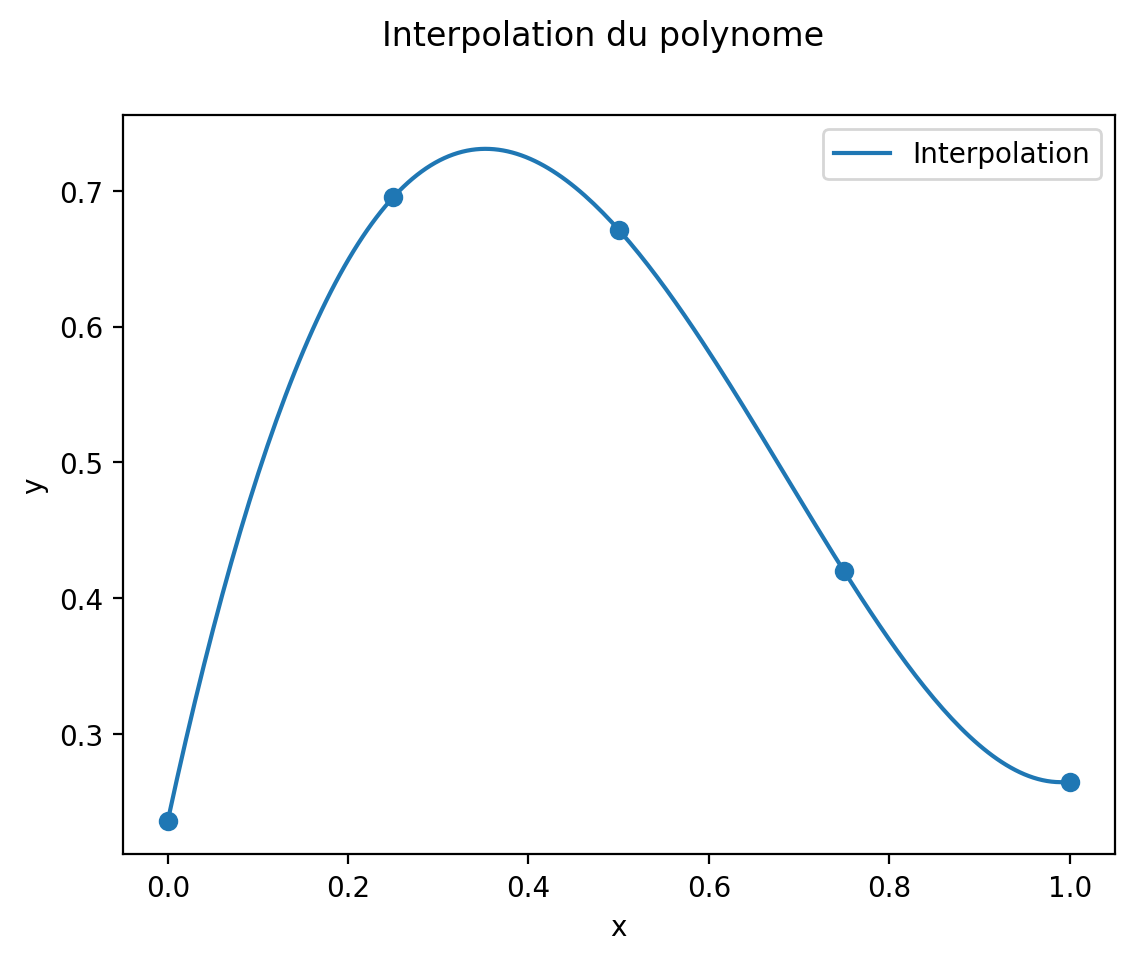

In [8]:
N = 5
x = np.linspace(0, 1, N)
y = np.random.rand(N)

plt.scatter(x, y)
xx = np.linspace(0, 1, 200)

plt.plot(xx, interp(x, y, xx), label=f'Interpolation')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.suptitle("Interpolation du polynome")

## Test de l'interpolation sur quelques fonctions

Nous allons à présent tester l'interpolation en prenant comme points d'interpolation des points qui sont sur le graphe de ces 4 fonctions. 

\begin{align}
f_0(x) &= \exp(-3(x-1.2)^2), &
f_1(x) &= \frac{x^2-2}{1+2x},\\
f_2(x) &= \frac{1}{1+(x-1.5)^2},&
f_3(x) &= \frac{\sin(2\pi x)}{1.1 - \sin(\pi x)}.
\end{align}

**Question**

> Définissez ces 4 fonctions et tracez les sur l'intervalle $[0, 3]$.

In [9]:
def f0(x):
    return np.exp(-3 * (x- 1.2)**2)

def f1(x):
    return (x**2 - 2) / (1+2 * x)

def f2(x):
    return 1/(1 + (x - 1.5)**2)

def f3(x):
    return np.sin(2 * np.pi * x) / (1.1 - np.sin(np.pi * x))

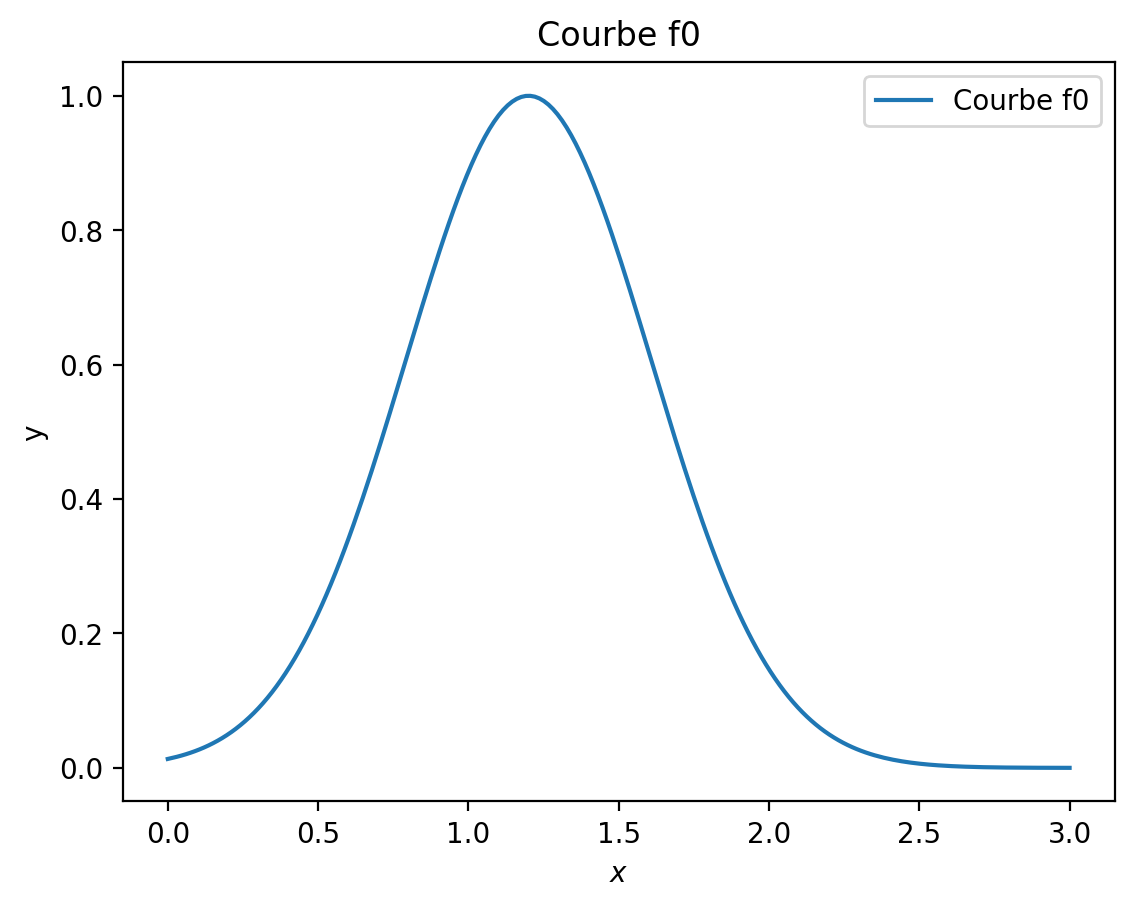

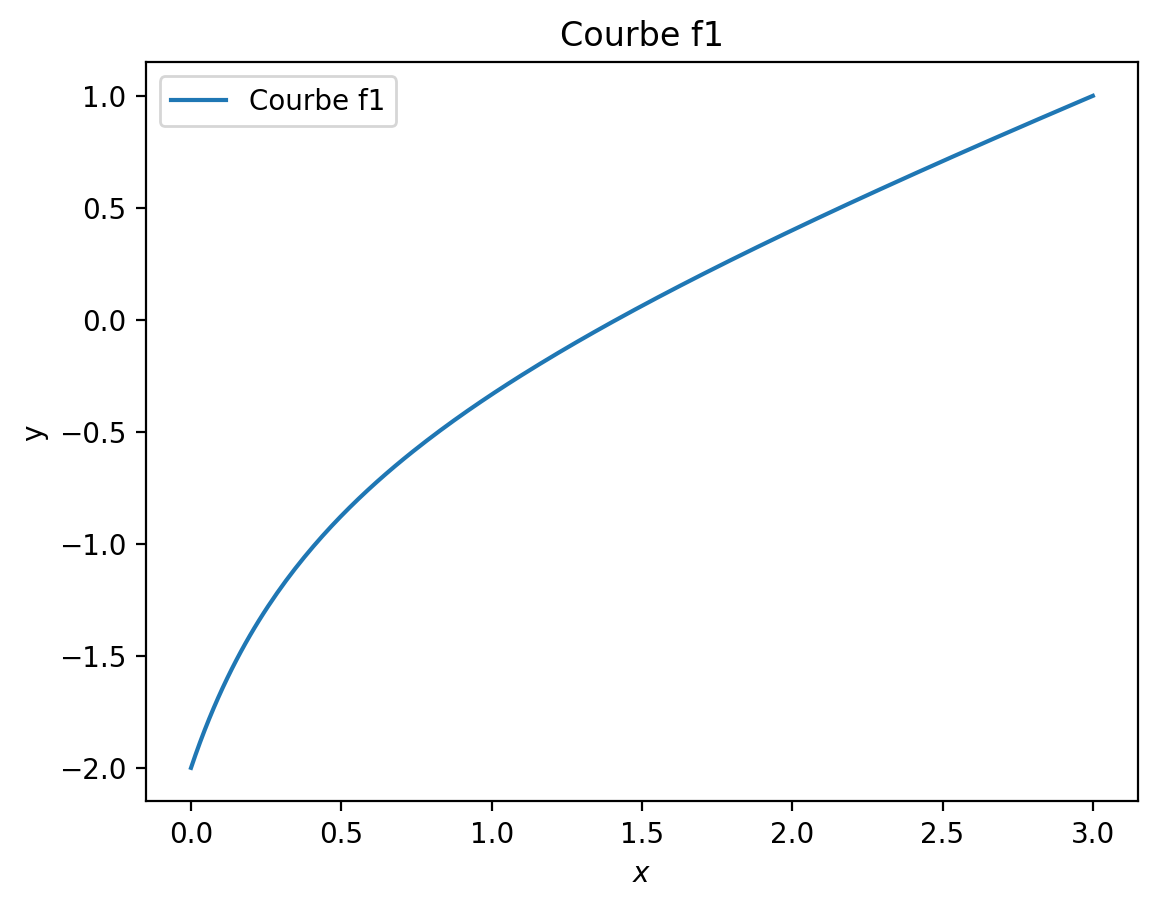

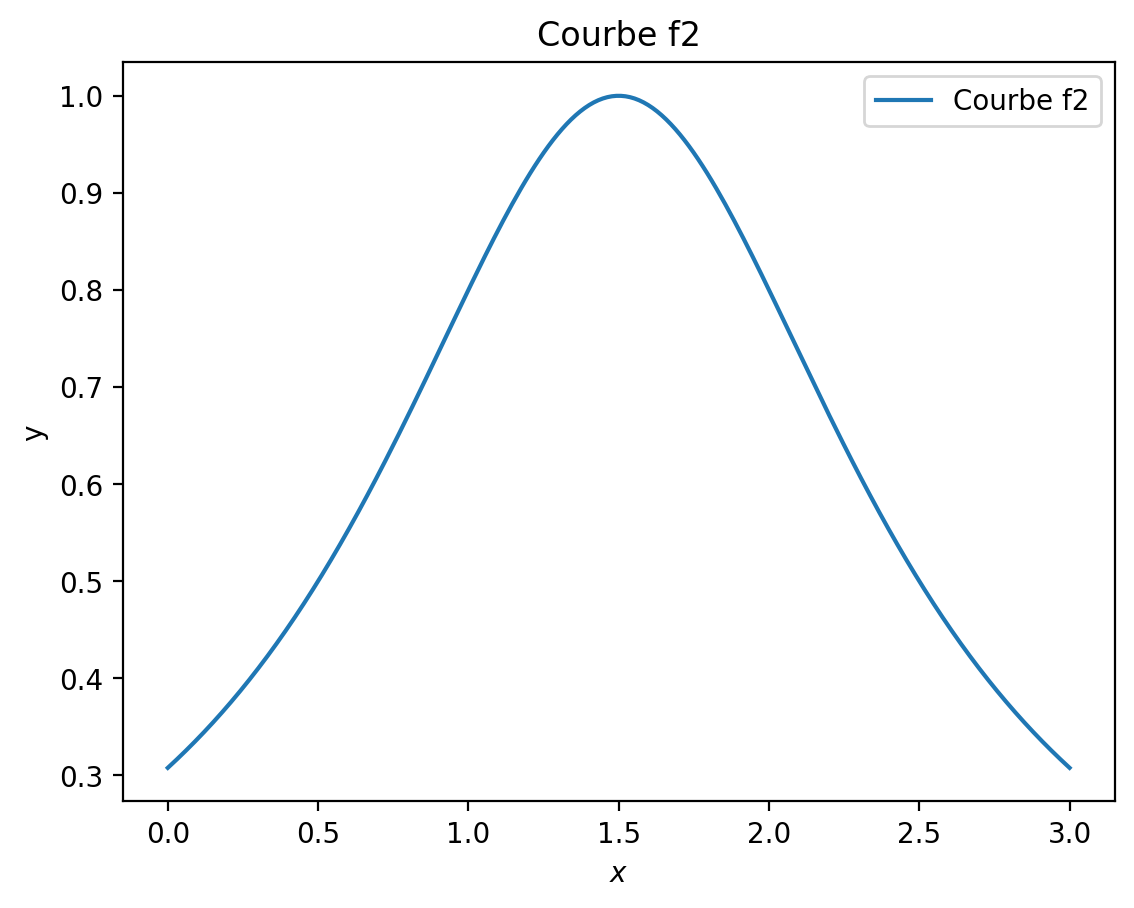

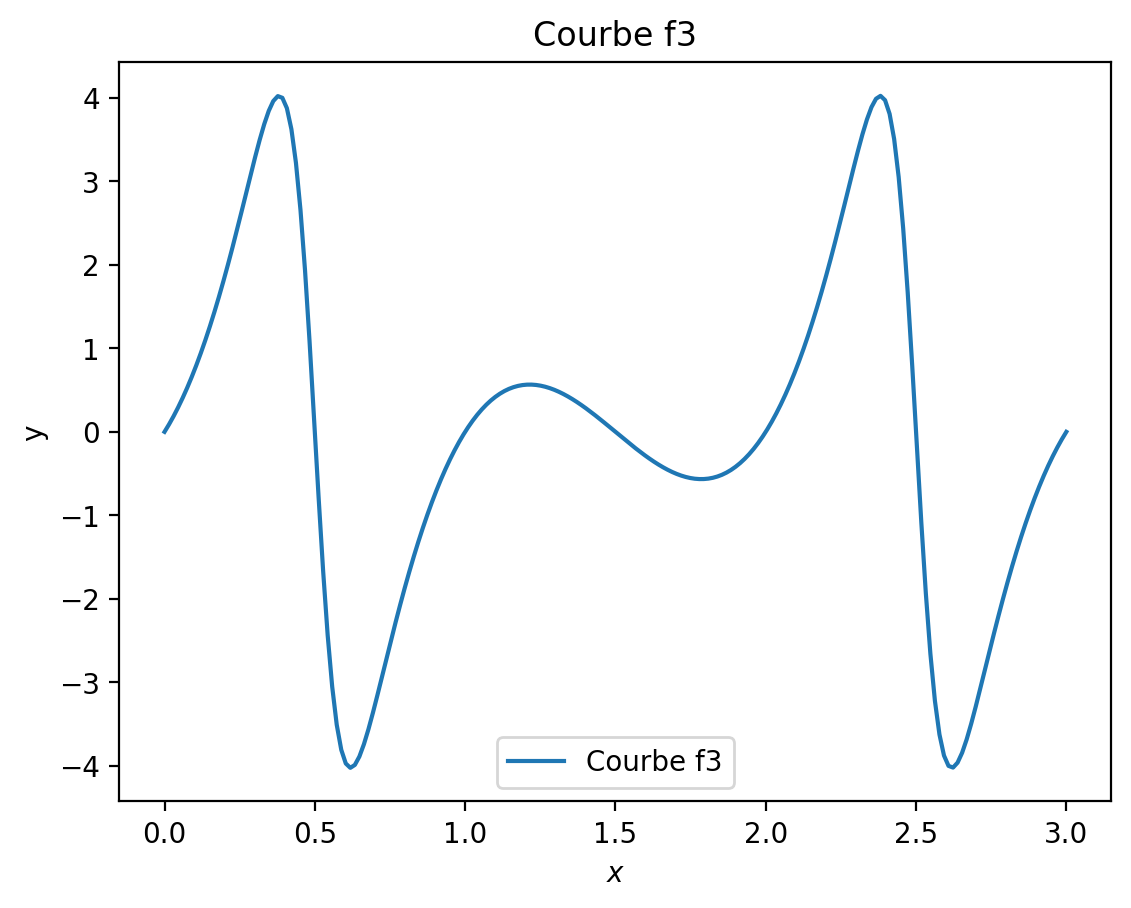

In [10]:
xx = np.linspace(0, 3, 200)

for f in [f0, f1, f2, f3]:
    plt.plot(xx, f(xx), label=f"Courbe {f.__name__}")
    plt.legend()
    plt.title(f"Courbe {f.__name__}")
    plt.xlabel(f"$x$")
    plt.ylabel("y")
    plt.show()

**Question**

> * Ajoutez sur les figures précédentes les polynômes interpolateurs qui passent par $N$ points équi-répartis des graphes des fonction avec $N\in\lbrace 4, 8, 12, 16, 20\rbrace$.
> * Que remarquez-vous lorsque $N$ augmente ?

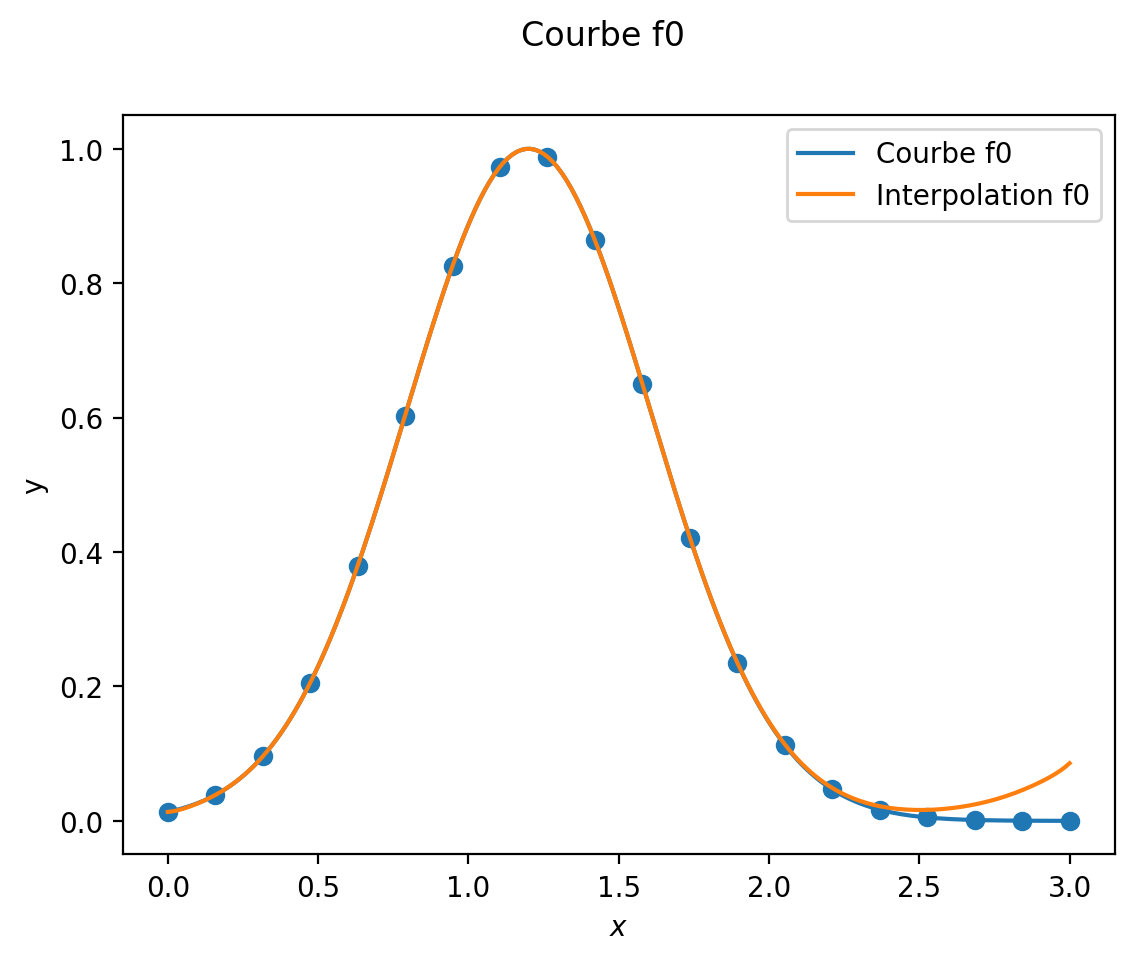

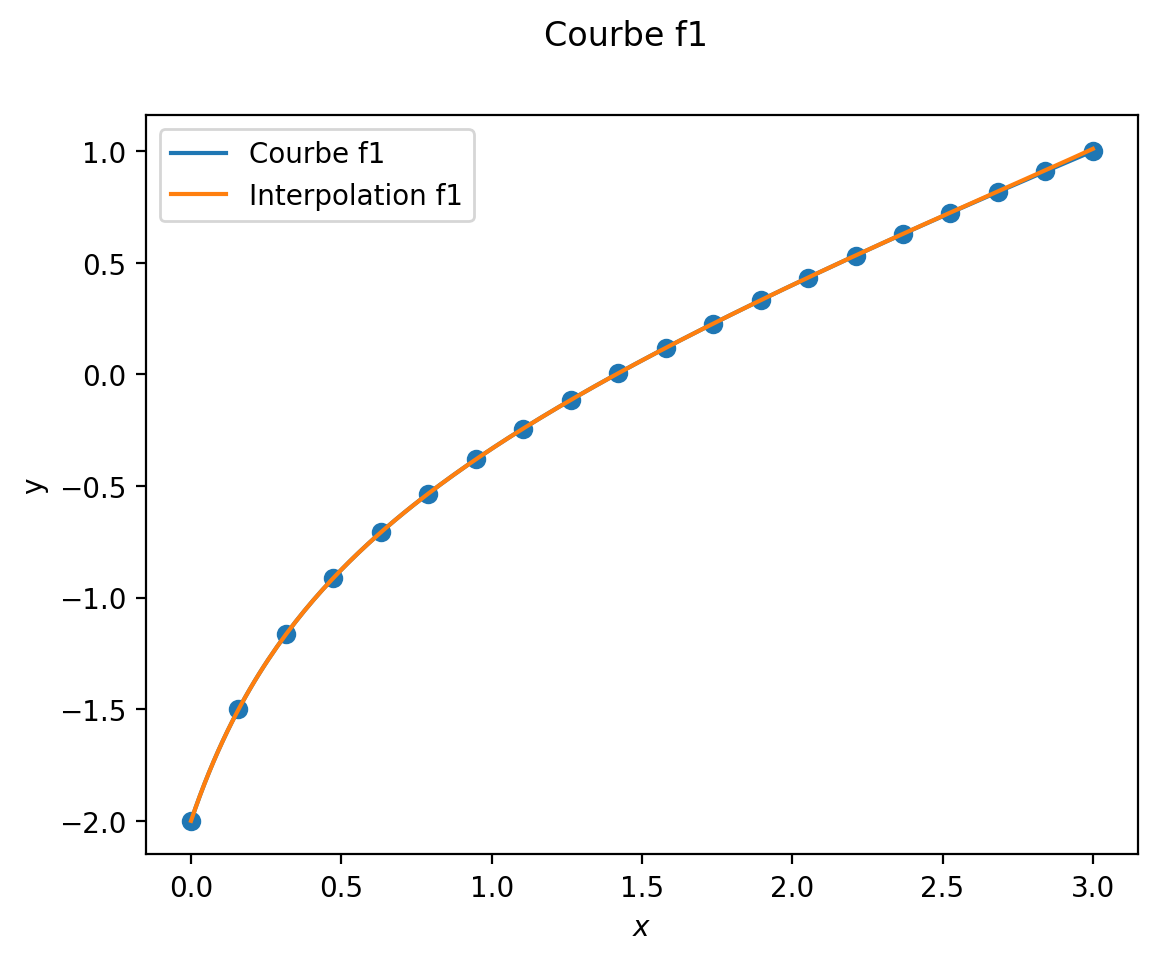

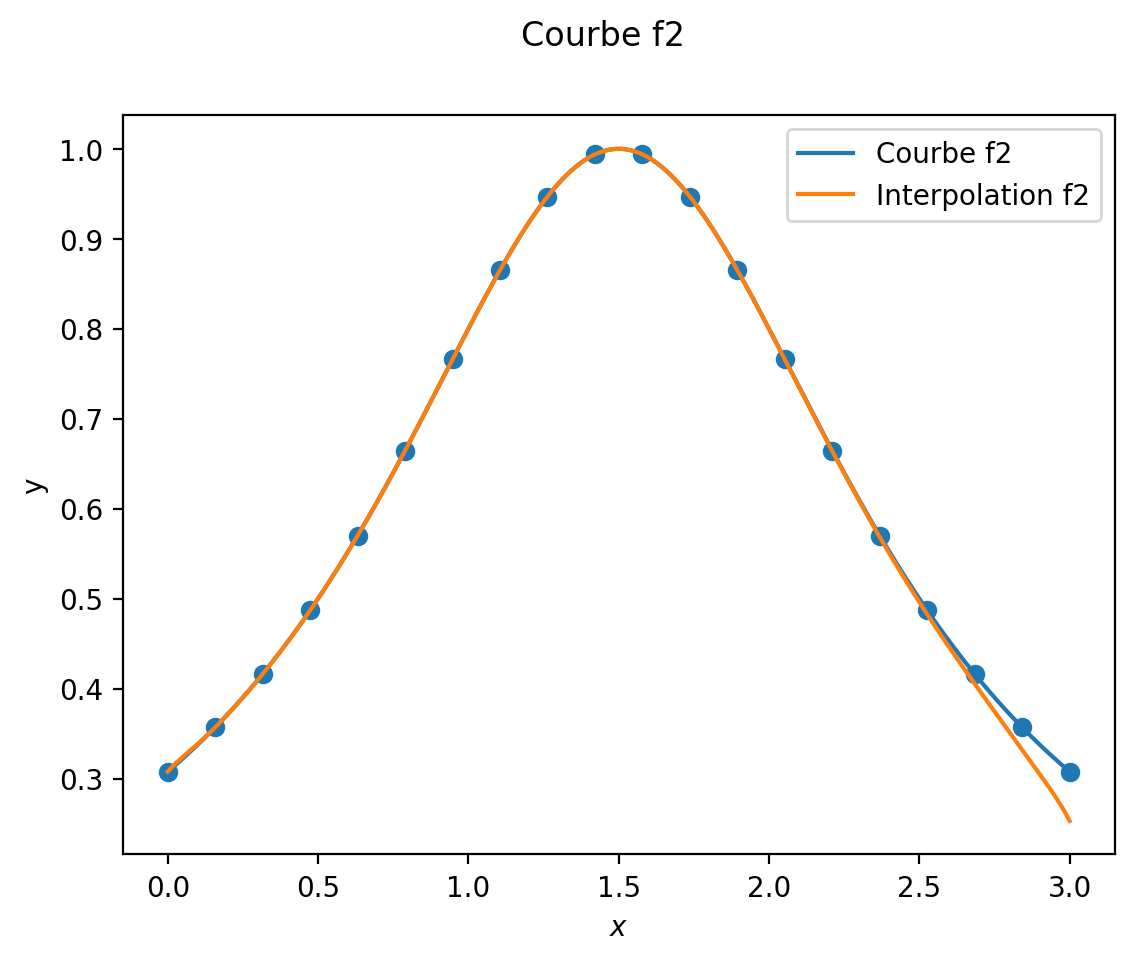

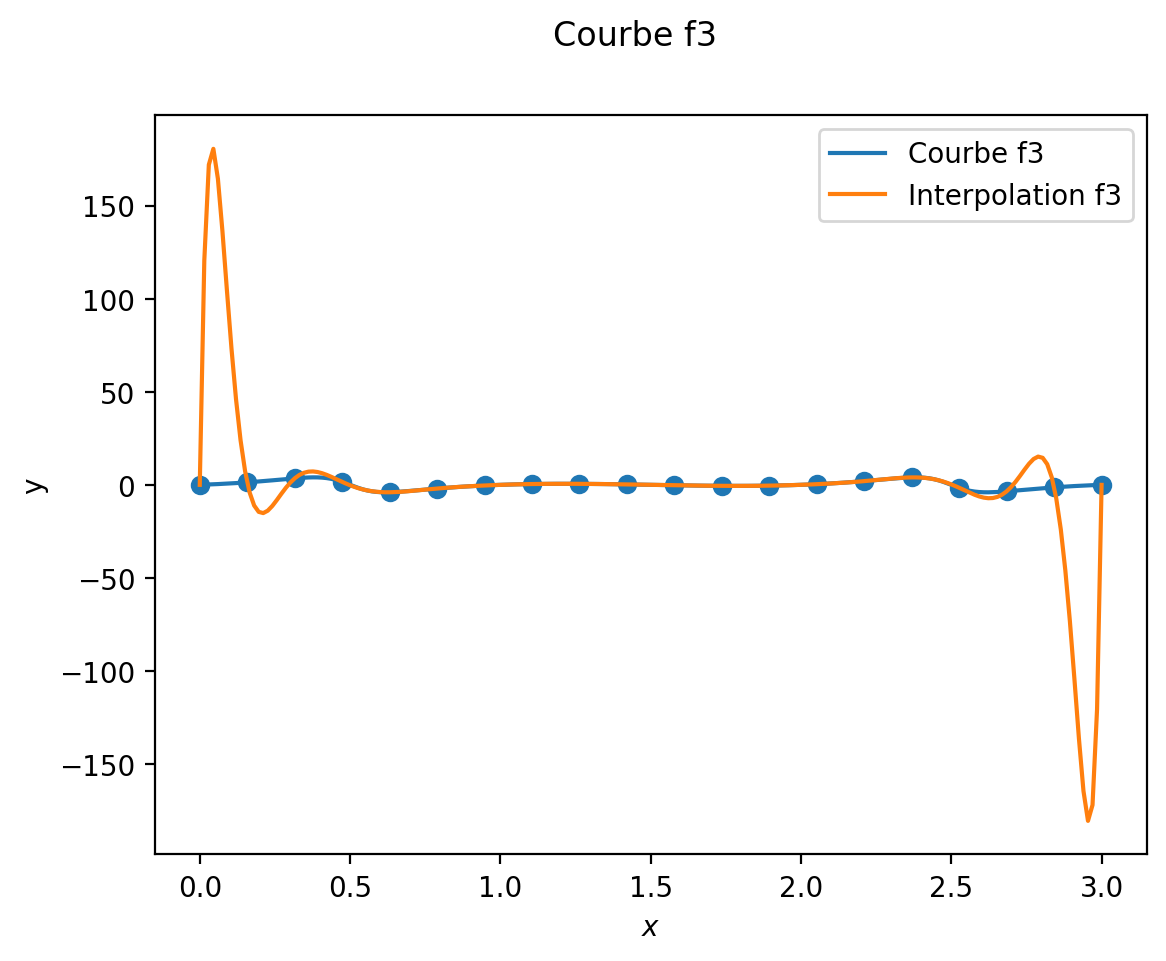

In [15]:
N = 20 # N appartient à [4, 8, 12, 16, 20] ou N est le nombre de points pour l'interpolation
x = np.linspace(0, 3, N)
xx = np.linspace(0, 3, 200)

for f in [f0, f1, f2, f3]:
    y = f(x)
    plt.plot(xx, f(xx), label=f"Courbe {f.__name__}")
    plt.scatter(x, y)
    plt.plot(xx, interp(x, y, xx), label=f'Interpolation {f.__name__}')
    plt.legend()
    plt.suptitle(f"Courbe {f.__name__}")
    plt.xlabel(f"$x$")
    plt.ylabel("y")
    plt.show()

Nous rappelons le résultat d'existence et d'unicité vu en cours

> **(Polynôme interpolateur de Lagrange)**<br>
> Etant donnés $N$ un entier strictement positif, $x_1,\ldots,x_N$ des réels deux à deux distincts et $y_1,\ldots,y_N$ des réels, il existe un unique polynôme $P$ qui vérifie
> $$ P\in\mathbb{R}_{N-1}[X], \qquad P(x_i)=y_i, \quad 1\leq i\leq N.$$

## Construction par la méthode de la matrice de Vandermonde

Nous rappelons que le vecteur $a=(a_1,\ldots,a_N)$des coefficients du polynôme interpolateur de Lagrange dans la base canonique de $\mathbb{R}_{N-1}[X]$ est solution du système linéaire
$$ M a = y$$
où $M$ est la matrice de Vandermonde associée aux points $(x_1,\ldots, y_N)$ et $y=(y_1,\ldots,y_N)$.
Nous avons
$$
M = \begin{pmatrix}
1&x_1&\ldots&x_1^{N-1}\\
1&x_2&\ldots&x_2^{N-1}\\
\vdots&\vdots&&\vdots\\
1&x_N&\ldots&x_N^{N-1}
\end{pmatrix}.
$$

**Question**

> 1. Proposez une fonction `interp_vdm_build` qui prend en argument un `ndarray` noté `x` et qui retourne la matrice de Vandermonde associée.
> 2. Proposez une fonction `interp_vdm_poly` qui 
>    * prend en argument deux `ndarray` notés `x` et `y` ;
>    * vérifie que les deux arguments ont bien la même taille ;
>    * calcule la matrice de Vandermonde `M` associée au vecteur `x` ;
>    * retourne la solution du système `Ma=y`.
> 3. Vérifiez que vos fonctions fonctionnent correctement en affichant les résultats pour des points bien choisis (vous pouvez prendre ce que vous voulez...)

*Indication : vous pourrez utiliser la fonction `fromfunction` du module `numpy`, la fonction `solve` du module `numpy.linalg`.*

In [12]:
def interp_vdm_build(x):
    size = x.shape[0]
    M = np.reshape(x, (size, 1))
    power = [x for x in range(0, size)]
    return M**power

def interp_vdm_poly(x, y):
    if x.shape != y.shape:
        raise ValueError("x and y must have same dimension!")
    return np.linalg.solve(interp_vdm_build(x), y

**Question**

> 1. Proposez une fonction `horner` qui prend en argument un `ndarray` noté `a` et un `ndarray` noté `xx` et qui retourne l'évaluation aux points du vecteur `xx` par l'algorithme de Hörner du polynôme dont les coefficients dans la base canonique sont stockés dans le vecteur `a`.
> 2. Proposez une fonction `interp_vdm` qui 
>    * prend en argument deux `ndarray` `x` et `y` de taille `N` et un `ndarray` `xx` de taille `M` ;
>    * calcule le polynôme interpolateur de Lagrange aux points donnés par les vecteurs `x` et `y` en utilisant la fonction `interp_vdm_poly` ;
>    * retourne l'évaluation de ce polynôme aux points du vecteur `xx` en utilisant la fonction `horner`.

In [26]:
def horner(a, xx):
    result = np.zeros(xx.shape)
    for i in range(len(a) - 1, -1, -1):
        result = result * xx + a[i]
    return result

def interp_vdm(x, y, xx):
    P = interp_vdm_poly(x, y)
    return horner(P, xx)

**Question**

> Afin de tester votre fonction : en prenant $N=5$,
> 1. prenez $N$ points équirépartis entre 0 et 1 (ce sera notre vecteur `x`) ;
> 2. générez $N$ valeurs aléatoires entre 0 et 1 (ce sera notre vecteur `y`) ;
> 3. tracez dans une fenêtre graphique le nuage de points d'abscisses `x` et d'ordonnées `y` à l'aide d'une commande `scatter` ;
> 4. ajoutez le tracé du polynôme interpolateur en prenant `xx` un vecteur de taille grande (plutôt 100 ou 200 points équi-répartis entre 0 et 1) ;
> 5. vérifiez que le polynôme interpolateur passe bien par les points d'interpolation.

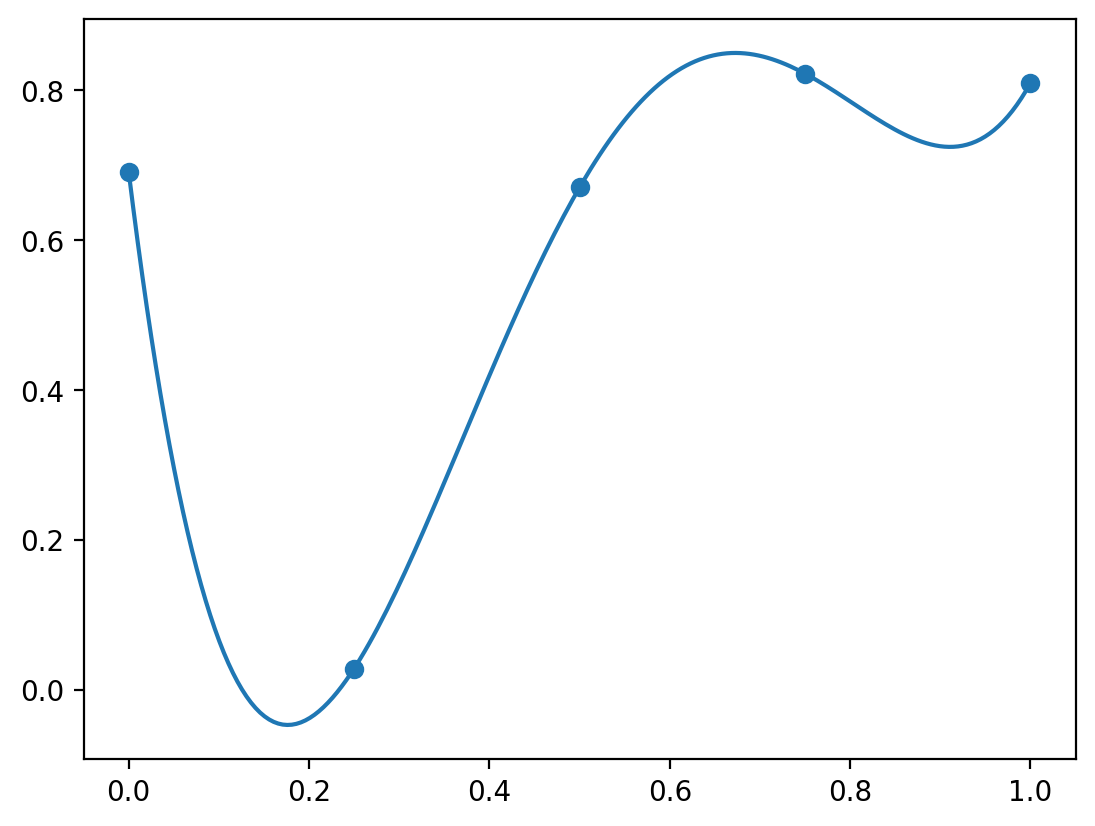

In [33]:
N = 5
x = np.linspace(0, 1, N)
y = np.random.rand(N)
xx = np.linspace(0, 1, 200)

plt.scatter(x,y)
plt.plot(xx, interp_vdm(x, y, xx))